In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.xlsx to ToyotaCorolla.xlsx


In [71]:
df=pd.read_excel('ToyotaCorolla.xlsx')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [72]:
df.drop('Id',inplace=True,axis=1)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [74]:
df1=pd.DataFrame()
columns_to_copy=['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
df1[columns_to_copy]=df[columns_to_copy]
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [75]:
df1.rename(columns={'Age_08_04':'Age'},inplace=True)

In [76]:
df1.isnull().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [77]:
df1.shape

(1436, 9)

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [79]:
df1[df1.duplicated()].shape

(1, 9)

In [80]:
df1.drop_duplicates(inplace=True)

In [81]:
df1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [82]:
numerical_features =df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

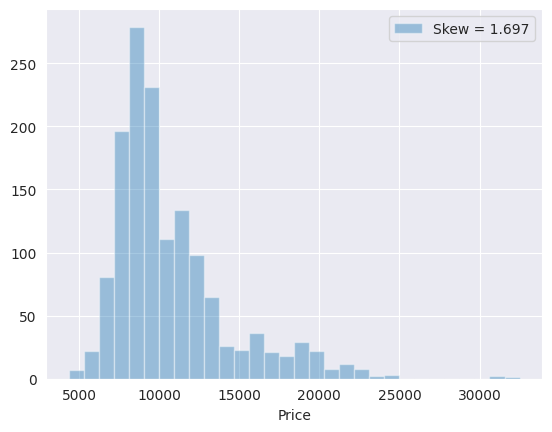

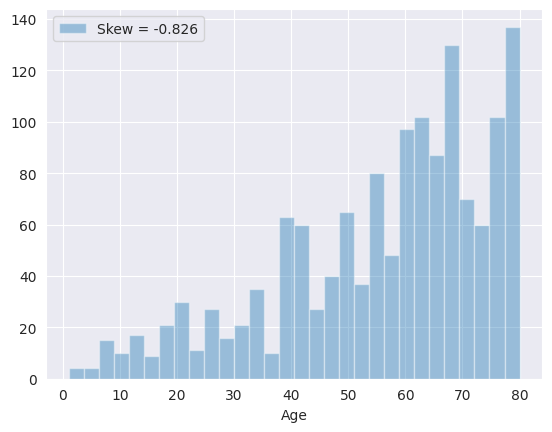

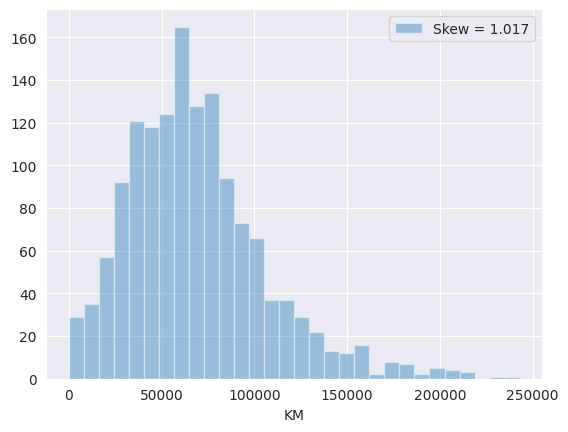

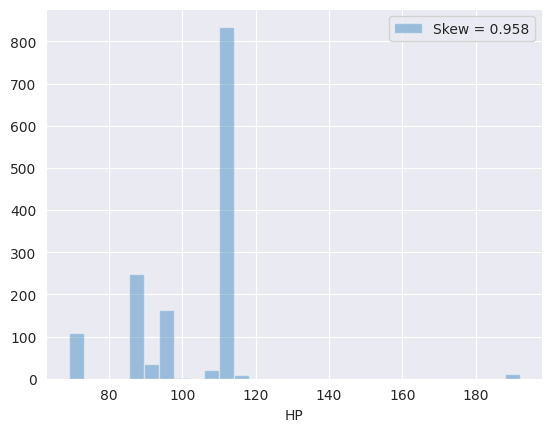

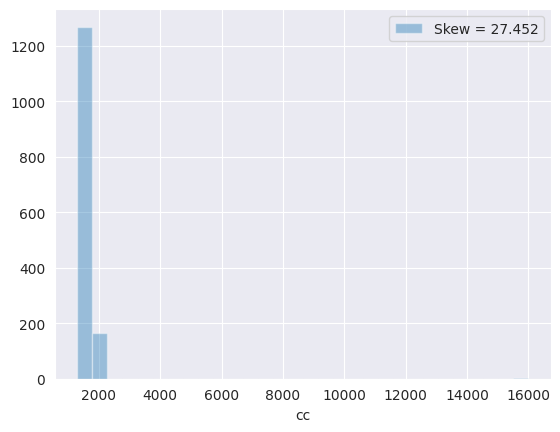

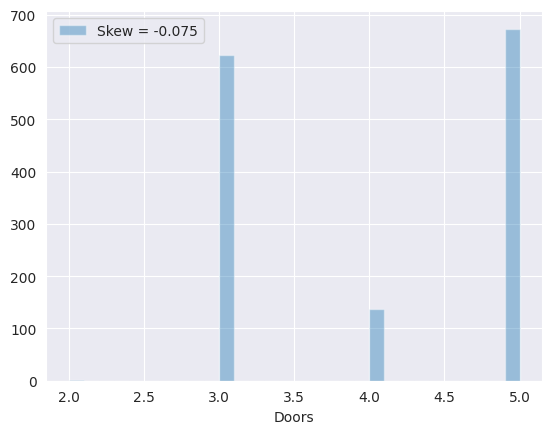

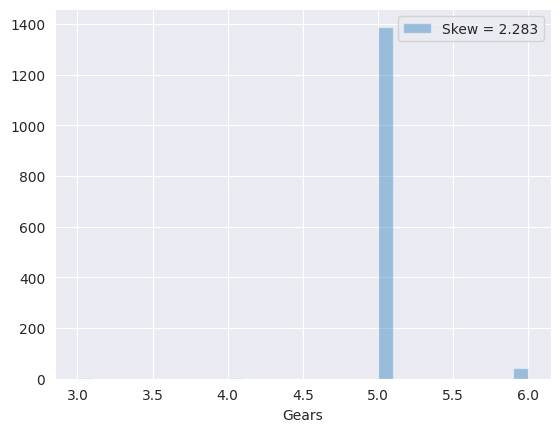

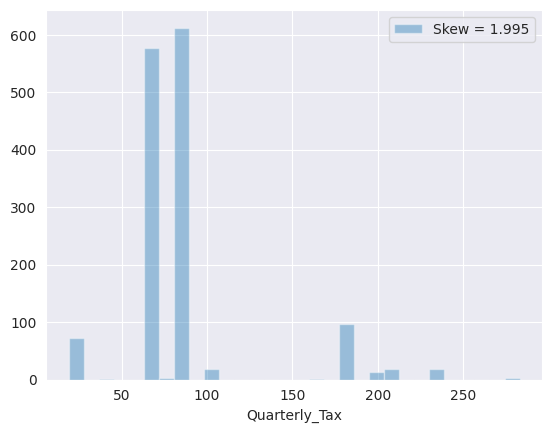

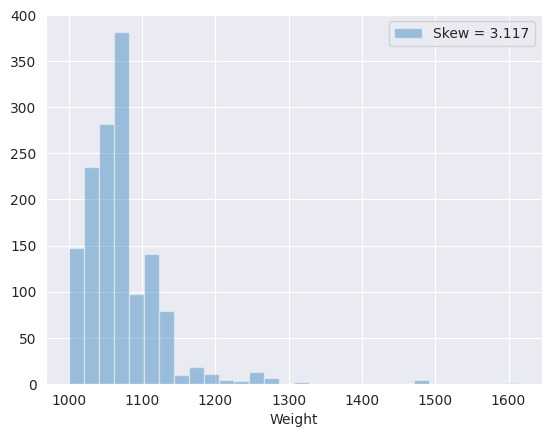

In [84]:
for i in numerical_features:
    skew = df1[i].skew()
    sns.distplot(df1[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [85]:
numerical_features

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

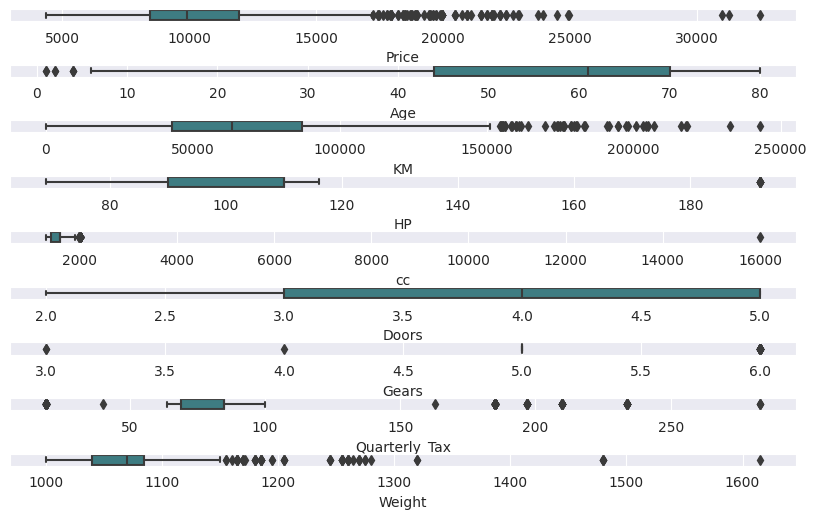

In [87]:
fig, axes = plt.subplots(9,1,figsize=(8,5),sharex=False,sharey=False)
sns.boxplot(x='Price', data= df1,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data= df1,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data= df1,palette='crest',ax=axes[2])
sns.boxplot(x='HP',data= df1,palette='crest',ax=axes[3])
sns.boxplot(x='cc',data= df1,palette='crest',ax=axes[4])
sns.boxplot(x='Doors',data= df1,palette='crest',ax=axes[5])
sns.boxplot(x='Gears',data= df1,palette='crest',ax=axes[6])
sns.boxplot(x='Quarterly_Tax',data= df1,palette='crest',ax=axes[7])
sns.boxplot(x='Weight',data= df1,palette='crest',ax=axes[8])
plt.tight_layout(pad=0.0)

In [88]:
df1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


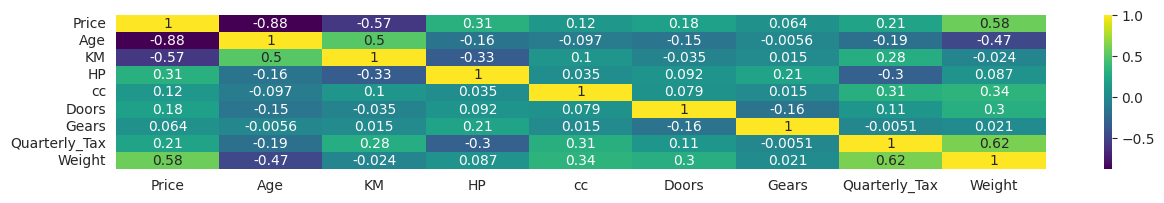

In [89]:
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(df1.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

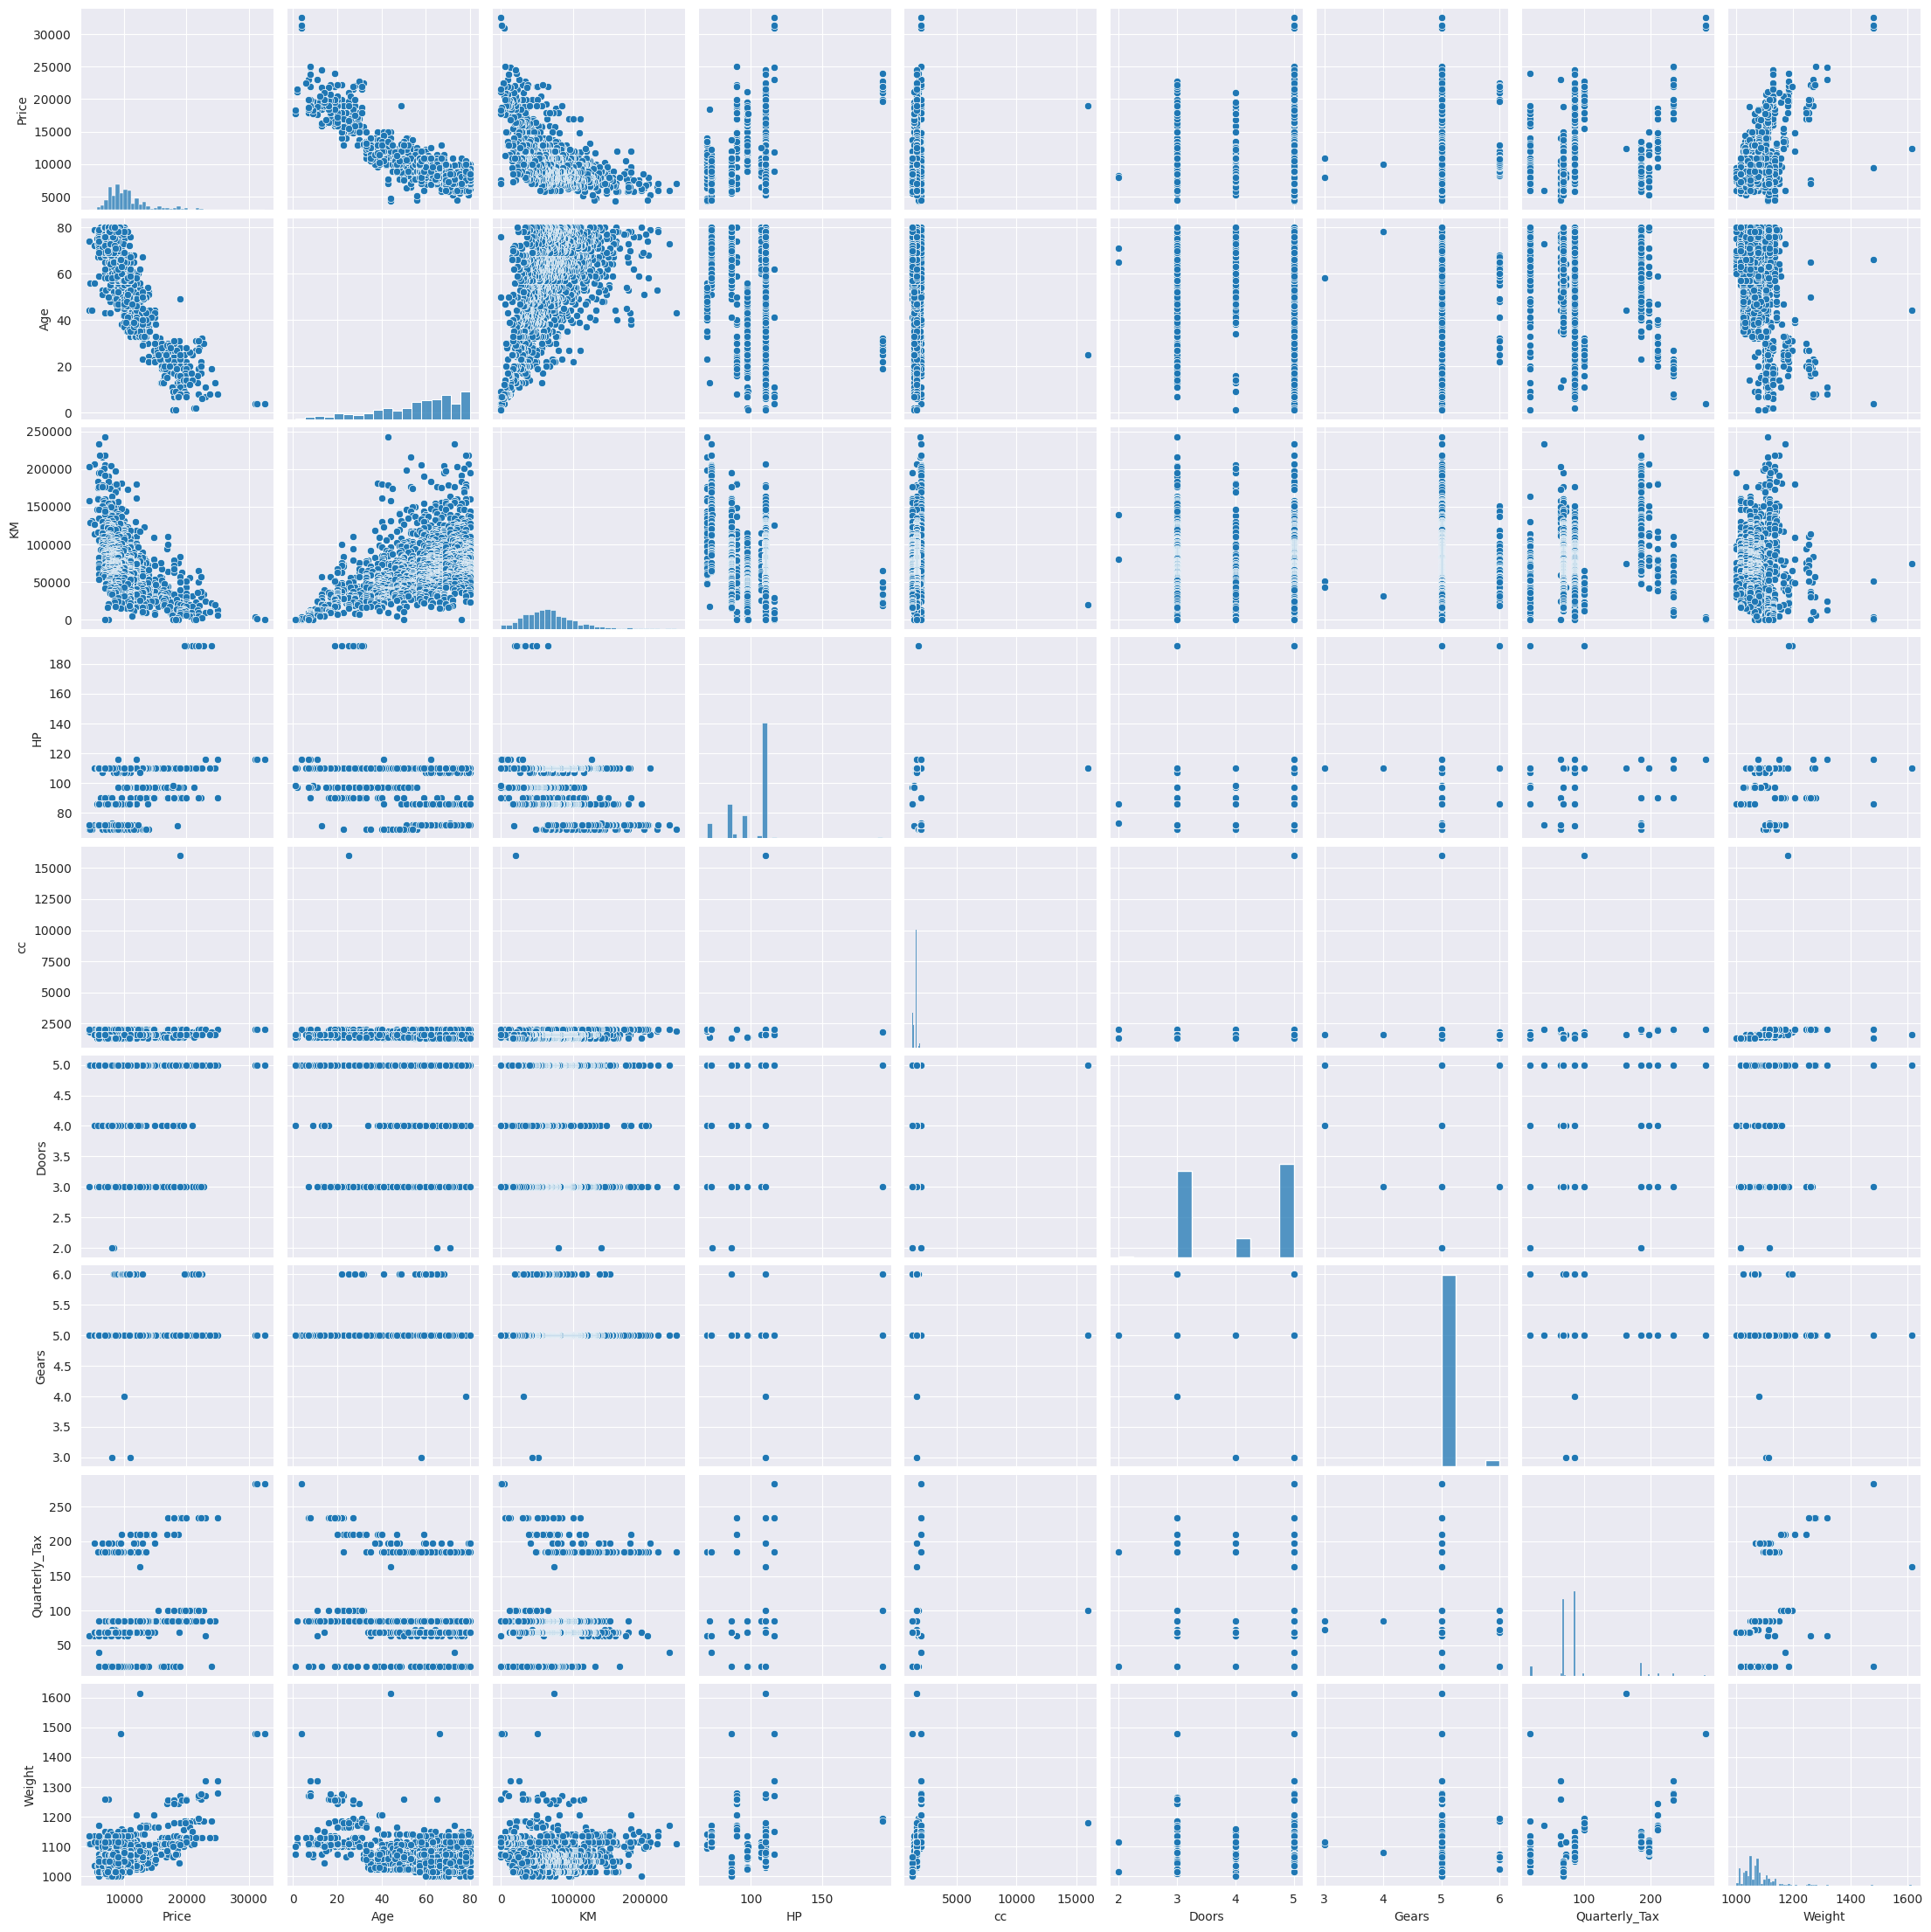

In [90]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

In [91]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()

In [92]:
model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [93]:
model.fittedvalues

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1431     8794.255037
1432     8292.577342
1433     8455.434402
1434     8579.222041
1435    10396.087526
Length: 1435, dtype: float64

In [94]:
df1['Predictions']=model.fittedvalues
df1['Errors']=model.resid
df1.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predictions,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277


In [95]:
model.pvalues

Intercept         1.113392e-04
Age              1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64

In [96]:
model.rsquared,model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)